In [1]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

Populating the interactive namespace from numpy and matplotlib


In [27]:
#There's 5 mds, and 4 .nc files in each

trajlist = []
for i in range(1,6):
    nc_list = []
    for k in range(1,5):
        path = "/net/jam-amaro-shared/bccgc4/CatSMD/md"+str(i)+"/"+str(k)+".nc"
        nc_list.append(path)
    trajlist.append(nc_list)

print(trajlist)
    

[['/net/jam-amaro-shared/bccgc4/CatSMD/md1/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md2/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md3/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md4/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md5/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/4.nc']]


In [29]:

trajfile=[['/net/jam-amaro-shared/bccgc4/CatSMD/md1/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md2/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md3/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md4/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/4.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md5/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md5/4.nc']]

feat = coor.featurizer("/net/jam-amaro-shared/bccgc4/CatSMD/md1/system.prmtop")
feat.add_residue_mindist([[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]], scheme="closest-heavy")
print(feat.describe()[:13])
#selecting distances at minimum
    
#feat.add_minrmsd_to_ref(traj[0])
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())
  



['RES_DIST (closest-heavy) PHE146 - TRP187', 'RES_DIST (closest-heavy) GLU116 - SER136', 'RES_DIST (closest-heavy) ARG142 - HIS143', 'RES_DIST (closest-heavy) PHE71 - PHE212', 'RES_DIST (closest-heavy) TRP27 - PHE29', 'RES_DIST (closest-heavy) LEU117 - TRP187', 'RES_DIST (closest-heavy) ASN64 - THR160', 'RES_DIST (closest-heavy) TYR119 - GLN20', 'RES_DIST (closest-heavy) PRO216 - PHE191', 'RES_DIST (closest-heavy) GLY24 - PHE146', 'RES_DIST (closest-heavy) TYR114 - TYR119']
trajectory length =  70000
number of dimension =  11


In [12]:
#feat = coor.featurizer(traj.topology)
#feat.add_residue_mindist([[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]], scheme="closest-heavy")
#print(feat.describe()[:13])
#selecting distances at minimum

05-11-18 15:07:12 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[5] WARNING  tried to re-add the same feature ResidueMinDistanceFeature
['RES_DIST (closest-heavy) PHE146 - TRP187', 'RES_DIST (closest-heavy) GLU116 - SER136', 'RES_DIST (closest-heavy) ARG142 - HIS143', 'RES_DIST (closest-heavy) PHE71 - PHE212', 'RES_DIST (closest-heavy) TRP27 - PHE29', 'RES_DIST (closest-heavy) LEU117 - TRP187', 'RES_DIST (closest-heavy) ASN64 - THR160', 'RES_DIST (closest-heavy) TYR119 - GLN20', 'RES_DIST (closest-heavy) PRO216 - PHE191', 'RES_DIST (closest-heavy) GLY24 - PHE146', 'RES_DIST (closest-heavy) TYR114 - TYR119', 'minrmsd to frame 0 of <mdtraj.Trajectory with 1 frames, 3324 atoms, 220 residues, and unitcells at 0x7f1d32b000f0>']


In [5]:
#feat.add_minrmsd_to_ref(traj[0])
#inp = coor.source(trajfile, feat)
#print(inp)
#print('trajectory length = ',inp.trajectory_length(0))
#print('number of dimension = ',inp.dimension())

trajectory length =  350000
number of dimension =  12


Projected data shape =  (70000, 3)
Mean values:  [ 0.08899888 -0.4172458  -0.04923635]
Variances:    [0.7068965 0.8158651 0.6323019]
[1773.31242523  940.14189642  742.47832222  401.40383198  363.30390338]


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


05-11-18 22:21:36 pyemma.coordinates.clustering.kmeans.KmeansClustering[42] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.
[array([14, 14, 14, ...,  5,  2, 13], dtype=int32)]
70000


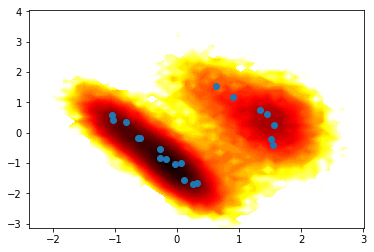

In [31]:
lag=1000
tica_obj = coor.tica(inp, lag=lag, var_cutoff=0.95, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))
print(-lag/np.log(tica_obj.eigenvalues[:5]))
 
# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

cl = coor.cluster_kmeans(data=Y,k=20)

#cl=coor.cluster_uniform_time(data=Y, )
# for later use we save the discretetrajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
 
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))


[-0.2782186   0.9038354  -0.8227239  -0.03498906  1.5228716  -0.5968001
  0.11088946  0.62524563 -0.17661671  1.4504845   1.5611658   1.5421002
  0.2658252  -1.0498576   1.3393638   0.07325193 -1.0321937   0.32379776
 -0.634309   -0.27299985]
[-0.83150274  1.1893114   0.3401748  -1.0426459  -0.2012194  -0.17550783
 -1.5707672   1.536833   -0.8706384   0.60384893  0.24499096 -0.40317905
 -1.7048713   0.60005766  0.7372849  -0.99669296  0.42080358 -1.6454704
 -0.18999083 -0.5282596 ]


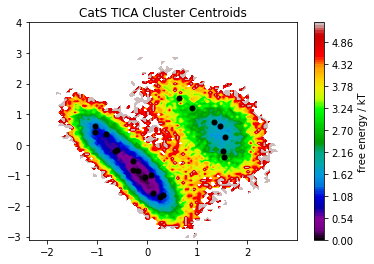

In [40]:
fig, axes= mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
title("CatS TICA Cluster Centroids" )

fig.savefig("tica_FE.png", dpi = 100)
#plot(cc_x[16], cc_y[16],linewidth=0, marker='o', markersize=5, color="red")
#plot(cc_x[7], cc_y[7],linewidth=0, marker='o', markersize=5, color="red")
#plot(cc_x[3], cc_y[3],linewidth=0, marker='o', markersize=5, color="red")

print(cc_x)
print(cc_y)

In [33]:
tica_obj.feature_TIC_correlation

array([[ 0.07110195, -0.02619497, -0.00655349],
       [ 0.04418192, -0.04310122,  0.01390593],
       [ 0.00655095,  0.0009886 , -0.00106177],
       [ 0.83008092,  0.52768104,  0.11261846],
       [-0.08560921,  0.06103238,  0.02063298],
       [ 0.04224941, -0.02259556,  0.0351613 ],
       [-0.61564062,  0.74166611,  0.07665885],
       [-0.11567196, -0.27662145, -0.11892936],
       [ 0.10184881, -0.0980808 ,  0.03731874],
       [ 0.11610824, -0.15804391, -0.03630969],
       [-0.10140876, -0.08114349,  0.98082854]])

In [34]:
tica_obj.cumvar

array([0.61735628, 0.84458127, 0.97355359, 0.98662943, 0.99438371,
       0.99687521, 0.99835711, 0.99943109, 0.99998705, 0.9999936 ,
       1.        ])

In [41]:
print(dtrajs)
dtraj=max(dtrajs)
print(dtraj)

[array([14, 14, 14, ...,  5,  2, 13], dtype=int32)]
[14 14 14 ...  5  2 13]


In [ ]:
#From here on it's clustering and extracting centroids, as well as saving out the centroid coords

In [42]:
Clusters={}

for count in range(0,20):
    frames=[]
    indices = [d for d, x in enumerate(dtraj) if x == count]
    frames.append(indices)
    Clusters[count]=frames
#print(Clusters)

In [43]:
for key in Clusters:
    print(key)
    a=traj[Clusters[key]]
    print(a)
    a.save_xtc('TICA_res_dis_Traj/Trajcluster_all'+str(key)+".xtc")

0
<mdtraj.Trajectory with 3301 frames, 3324 atoms, 220 residues, and unitcells>


/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xyz = self.xyz[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1119: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time = self.time[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

OSError: Unable to open file "TICA_res_dis_Traj/Trajcluster_all0.xtc"

In [44]:
avg = [100, 100, 100, 100, 100,100, 100, 100, 100, 100,100, 100, 100, 100, 100,100, 100, 100, 100, 100]
indices = np.zeros(20)
for i in range(len(Y)):
    c = cl.clustercenters[cl.dtrajs[0][i]]
    
    v = Y[i]
    
    newavg = np.linalg.norm(c-v)
   
    if avg[cl.dtrajs[0][i]] > newavg:
        avg[cl.dtrajs[0][i]] = newavg
        indices[cl.dtrajs[0][i]] = i
        
print(avg)
print(indices)

for i in range(len(avg)):
    traj[i].save_pdb('rep_struct/testing_pdb_res%s.pdb' % i)

[0.03809505, 0.039522327, 0.012974997, 0.023403972, 0.074089125, 0.0077476003, 0.045187086, 0.07352319, 0.024873367, 0.02864539, 0.066973135, 0.036188196, 0.02788832, 0.031696353, 0.0402841, 0.06589054, 0.033944506, 0.018335674, 0.0366809, 0.031794235]
[60669.  2265. 54265. 56488. 16362. 55344. 37666. 42412. 38143. 50664.
 64773. 50137. 67132. 47152. 49780. 16624. 56053. 58131. 45719. 21777.]


In [ ]:
import glob

path="/home/jegan/Documents/TICA/*.xtc"

files=glob.glob(path)

print(files)

In [49]:
#writing a string to select the features in vmd
poc = [[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]]

pock = []
for i in poc:
    for k in i:
        phrase = "resid "+str(k)+" or "
        pock.append(phrase)

f= open("vmd_poc_string.txt", "w+")

for y in pock:
    f.write(y)
    
f.close()
    